情報理工学院・情報工学系

18M30841

鄭 志豪

problem2-1: Proximal Gradient method

[[0.90909091]
 [1.54545455]]


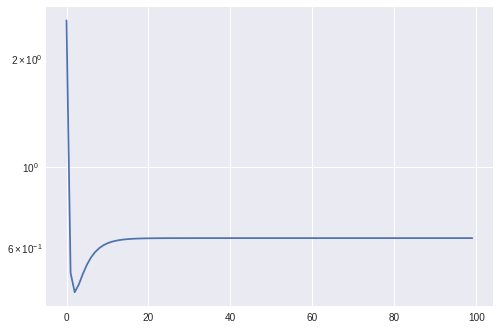

In [12]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

ramuda = 1
A = np.mat([[3,0.5], [0.5,1]])
w = np.mat([[3], [-1]])
myu = np.array([[1], [2]])
Lipsitz = np.max(np.linalg.eigvals(2 * A))

def f(A, w, myu, ramuda):
    return (np.dot(np.dot((w - myu).T, A), (w - myu)) + ramuda * np.linalg.norm(w, 1))[0, 0]

def grad(A, w, myu):
    return 2 * np.dot(A, (w - myu))

def soft_thresh(update, threshold):
    return np.multiply(np.sign(update), np.maximum(0, np.abs(update) - threshold))

J_list = []
W = []

for i in range(100):
    J_list.append(f(A, w, myu, ramuda))
    W.append((w[0, 0], w[1, 0]))
    w = soft_thresh(w - grad(A, w, myu) / Lipsitz, ramuda / Lipsitz)
print(w)

J = f(A, w, myu, ramuda)

res = []
for element in W:
    res.append(np.linalg.norm((element[0] - w[0,0], element[0] - w[1,0])))

plt.yscale('log') 
plt.plot(res)
plt.show()
